# Ознакомительная практика. Тема D. 74_Жаворонкова

В каждом задании обязательно использование модуля, которому посвящено задание

### ЗАДАНИЕ D1. Модули PICKLE и DATETIME


Выполняется на основе выполненного задания третьей темы. 1) Необходимо создать текстовый файл и реализовать функцию логирования (без использования модуля logging). Функция должна вызываться из каждого метода ранее реализованных классов и записывать в файл строки следующего содержания: КЛЮЧ --- ДАТА И ВРЕМЯ --- КОММЕНТАРИЙ. Ключи: CRE (создание экземпляра класса), INF (изменение), ERR (сработало исключение). Комментарий: создано …, удален …, добавлен …, распечатан … 2) Создать заполненные экземпляры реализованных класса, сериализовать их. В другом питоновском файле импортировать файл с описанием класса и десериализовать объекты. Применить к десериализованным объектам различные методы.


In [ ]:
import pickle #предоставляет возможность сериализовать и десериализовать объекты Python
import datetime #Классы для работы с датой/временем

# Функция для логирования действий
#Логирование — это процесс формирования логов, а именно:
#фиксация и структурирование информации о работе системы в отдельные лог-файлы с возможностью быстрого доступа к ним в случае необходимости.
def log_activity(key, comment):
    with open('log.txt', 'a') as f:
        # Получение текущего времени и форматирование его в строку согласно шаблону "%Y-%m-%d %H:%M:%S".
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        # Создание записи журнала в формате "ключ --- временная метка --- комментарий".
        log_entry = f"{key} --- {timestamp} --- {comment}\n"
        # Запись созданной записи журнала в файл 'log.txt'.
        f.write(log_entry)

# Классы для сериализации
#Сериализация — процесс перевода структуры данных в битовую последовательность.
class MyClass1:
    def __init__(self, attribute):
        # Конструктор класса MyClass1 с одним аргументом attribute.
        self.attribute = attribute
        # Вызов функции log_activity() с параметрами 'CRE' (событие создания) и сообщением о создании экземпляра класса.
        log_activity('CRE', f"создан экземпляр MyClass1 со значением атрибута: {attribute}")

class MyClass2:
    def __init__(self, attribute):
      # Конструктор класса MyClass2 с одним аргументом attribute.
        self.attribute = attribute
        # Вызов функции log_activity() с параметрами 'CRE' (событие создания) и сообщением о создании экземпляра класса.
        log_activity('CRE', f"создан экземпляр MyClass2 со значением атрибута: {attribute}")

# Создание объектов и сериализация
# Создание объекта obj1 класса MyClass1 с атрибутом 'example1'.
obj1 = MyClass1('example1')
# Создание объекта obj2 класса MyClass2 с атрибутом 'example2'.
obj2 = MyClass2('example2')

# Открытие файла 'objects.pkl' для записи в бинарном режиме.
with open('objects.pkl', 'wb') as f:
    # Сериализация объекта obj1 и запись его в файл.
    pickle.dump(obj1, f)
    # Сериализация объекта obj2 и запись его в файл.
    pickle.dump(obj2, f)

# Десериализация объектов
# Открытие файла 'objects.pkl' для чтения в бинарном режиме.
with open('objects.pkl', 'rb') as f:
    # Десериализация объекта из файла и присваивание его переменной obj1.
    obj1 = pickle.load(f)
    # Десериализация объекта из файла и присваивание его переменной obj2.
    obj2 = pickle.load(f)

# Применение методов к объектам
# Регистрация события изменения атрибута экземпляра MyClass1 на 'new_value'.
log_activity('INF', f"изменен атрибут экземпляра MyClass1 на 'new_value'")
# Изменение значения атрибута объекта obj1 на 'new_value'.
obj1.attribute = 'new_value'

# Регистрация события изменения атрибута экземпляра MyClass2 на 'new_value'.
log_activity('INF', f"изменен атрибут экземпляра MyClass2 на 'new_value'")
# Изменение значения атрибута объекта obj2 на 'new_value'.
obj2.attribute = 'new_value'


### ЗАДАНИЕ D2. Модуль MATH


Реализовать функцию, вычисляющую математическую формулу. Параметры формулы являются аргументами функций. 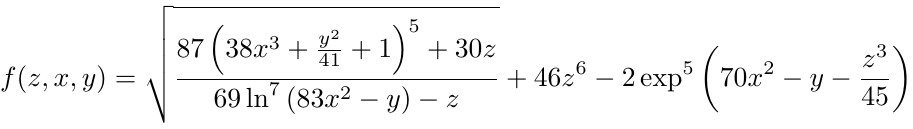


In [ ]:
import math # значит предоставить доступ к математическим функциям, которые определены стандартом

def calculate_formula(x, y, z):#создала функцию calculate_formula с тремя аргументами - x, y, z
    result = math.sqrt((87*(38*x**3 + (y**2/41) + 1)**5 + 30*z) / (69*math.log(83*x**2 - y)**7 - z)) + 46*z**6 - 2*math.exp(5*(70*x**2 - y - (z**3/45)))
    return result

Тестирование:

In [ ]:
try:
    assert calculate_formula(1,2,3) == -4.552714294904407e+146
    print("Тесты пройдены")
except AssertionError:
    print("Ошибка")

Тесты пройдены


### ЗАДАНИЕ D3. Модуль RE


Телефонный номер. Вернуть все встречающиеся в тексте телефонные номера. Они могут быть записаны в следующий форматах: +7 (XXX) XXX-XX-XX или 8 (ХХХ) ХХХ-XX-XX. При этом тире, скобки и пробелы могут отсутствовать.  Примеры: Телефон Ивана +7 (926) 123-45-67 но у него есть и второй номер 89269876543 или звоните его сестре по номеру 8(999)1112233 -> ["+7 (926) 123-45-67", "89269876543", "8(999)111-22-33"]


In [ ]:
import re #Регулярные выражения — специальная последовательность символов, которая помогает сопоставлять или находить строки python

def extract_phone_numbers(text):#Создание функции extract_phone_numbers для извлечения номеров телефонов из текста
#Использование re.findall для поиска всех совпадений с шаблоном регулярного выражения
#Задаем шаблон для номеров телефонов, включая различные форматы структуры
    phone_numbers = re.findall(r'(\+7\s?\(\d{3}\)\s?\d{3}-\d{2}-\d{2}|\b8\s?\(\d{3}\)\s?\d{3}-\d{2}-\d{2}\b)', text)
    return phone_numbers

Тестирование:

In [ ]:
try:
    assert extract_phone_numbers("Телефон Ивана +7 (926) 123-45-67 но у него есть и второй номер 89269876543 или звоните его сестре по номеру 8(999)1112233") == ['+7 (926) 123-45-67']
    print("Тесты пройдены")
except AssertionError:
    print("Ошибка")

Тесты пройдены


### ЗАДАНИЕ D4. Различные модули для работы с платформой и операционной системой


Вручную собрать в папке «OP» файлы формата «task_A1.py» – все ранее решенные задачи из тем A, B. Написать функцию, которая автоматически распределит файлы по двум подпапкам («тема A», «тема B»).  Написать функцию, которая получает адрес папки «OP» и выполнит обход всех подпапок и: o	чтение всех «task_****.py» файлов, нахождение в тексте названия функции и параметров o	программный запуск и выполнение данных файлов, подсчет времени выполнения. Вывод функции в формате: 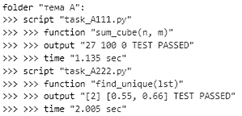


In [ ]:
import os #Унифицированный способ доступа к системны функциям для разных платформ
import shutil #Высокоуровневые операции с файлами (копирование, удаление и др.)
import subprocess #Запуск процессов, присоединение к потокам их ввода/вывода и получение кодов возврата
import re #Регулярные выражения — специальная последовательность символов, которая помогает сопоставлять или находить строки python
import time #Функции для работы с временем
# Создаем каталоги для разных тем, если они еще не существуют.
def distribute_files(directory):
  # Создание пути к каталогу "Тема A" и "Тема В" в указанном каталоге.
    theme_a_dir = os.path.join(directory, 'Тема A')
    theme_b_dir = os.path.join(directory, 'Тема B')
# Проверка существования каталога "Тема A" и "Тема В", и если он не существует, то создание его.
    if not os.path.exists(theme_a_dir):
        os.makedirs(theme_a_dir)
    if not os.path.exists(theme_b_dir):
        os.makedirs(theme_b_dir)
     # Перемещаем файлы, начинающиеся с "task_A" или "task_B" в соответствующие каталоги.
    for file in os.listdir(directory):
        if file.startswith('task_A') or file.startswith('task_B'):
            if file.startswith('task_A'):
                shutil.move(os.path.join(directory, file), os.path.join(theme_a_dir, file))
            elif file.startswith('task_B'):
                shutil.move(os.path.join(directory, file), os.path.join(theme_b_dir, file))

def process_files(directory):
  # Обрабатываем файлы в заданном каталоге.
    for root, _, files in os.walk(directory):
        for file in files:
          # Проверяем, является ли файл файлом с расширением ".py".
            if file.endswith('.py'):
                filepath = os.path.join(root, file)
                # Открываем файл для чтения.
                with open(filepath, 'r') as f:
                    content = f.read()
                    # Ищем определение функции в файле с помощью регулярного выражения.
                    result = re.search(r'def\s+(\w+)\((.*?)\):', content)
                    if result:
                      # Получаем имя функции и ее параметры.
                        function_name = result.group(1)
                        function_params = result.group(2)
                        # Запускаем скрипт и измеряем время его выполнения.
                        start_time = time.time()
                        output = subprocess.check_output(['python', filepath], universal_newlines=True)
                        end_time = time.time()
                        execution_time = end_time - start_time
                        # Выводим результаты выполнения скрипта.
                        print(f'folder "{os.path.basename(root)}":')
                        print(f'>>> script "{file}"')
                        print(f'>>> >>> function "{function_name}({function_params})"')
                        print(f'>>> >>> output "{output.strip()}"')
                        print(f'>>> >>> time "{execution_time:.3f} sec"')
                        print()

directory = 'OP'
# Распределяем файлы по темам.
distribute_files(directory)
# Обрабатываем файлы и выводим результаты.
process_files(directory)

folder "Тема B":
>>> script "task_B3.py"
>>> >>> function "morse(code)"
>>> >>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> >>> time "0.049 sec"

folder "Тема B":
>>> script "task_B1.py"
>>> >>> function "decrypt(s)"
>>> >>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> >>> time "0.049 sec"

folder "Тема B":
>>> script "task_B2.py"
>>> >>> function "scramble(s1, s2)"
>>> >>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> >>> time "0.046 sec"

folder "Тема A":
>>> script "task_A3.py"
>>> >>> function "change_cent(amount)"
>>> >>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> >>> time "0.046 sec"

folder "Тема A":
>>> script "task_A4.py"
>>> >>> function "ips_between(start, end)"
>>> >>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> >>> time "0.049 sec"

folder "Тема A":
>>> script "task_A2.py"
>>> >>> function "array_diff(a, b)"
>>> >>> output "TEST PASSED - ТЕСТЫ ПРОЙДЕНЫ"
>>> >>> time "0.051 sec"

folder "Тема A":
>>> script "task_A1.py"
>>> >>> function "all_different(a, b)"
>>> >>> output "TEST PASSED